In [1]:
# load required libraries
options(stringsAsFactors = F)
suppressPackageStartupMessages({
library(Seurat)
library(clusterProfiler)
library(org.Mm.eg.db)
library(enrichplot)
library(msigdbr)
library(ggplot2)
library(ggpubr)
library(dplyr)
library(Matrix)
library(Hmisc)
library(viridis)
library(RColorBrewer)
library(ggrepel)
library(reshape2)
library(ggpubr)
library(pheatmap)
library(ggVolcano)
library(gtools)
})
set.seed(123)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
# load the sample
sample <- readRDS("../5_EHT_TE_Silencing_Relaxation/sample_mouse_TE_EHT.rds")
sample

An object of class Seurat 
51023 features across 5103 samples within 2 assays 
Active assay: SCT (17451 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

In [3]:
# set genes and TEs
TE_name <- grep(rownames(sample), pattern = "\\.LINE|\\.SINE|\\.LTR|\\.DNA|\\.SVA", value = T)
length(TE_name)
gene_name <- setdiff(rownames(sample), TE_name)
length(gene_name)

[1] 1016

[1] 16435

In [4]:
# differential expression analysis Hema vs Endo
hema_endo_marker_genes <- FindMarkers(sample, features = gene_name, assay = "SCT", ident.1 = c("HEC","HSC"), ident.2 = c("VEC", "AEC"), only.pos = F, verbose = FALSE)
write.csv(hema_endo_marker_genes, "meta/hema_endo_marker_genes_mouse.csv")

In [5]:
# fold change Hema vs Endo
hema_endo_fc <- FoldChange(sample, features = gene_name, `ident.1` = c("HEC","HSC"), ident.2 = c("VEC", "AEC"), assay = "SCT")
hema_endo_fc_up <- subset(hema_endo_fc, avg_log2FC > 0)

In [6]:
# get Hema significant degs
hema_endo_marker_genes_significant <- subset(hema_endo_marker_genes, avg_log2FC >= 0.25 & p_val_adj <= 0.05)

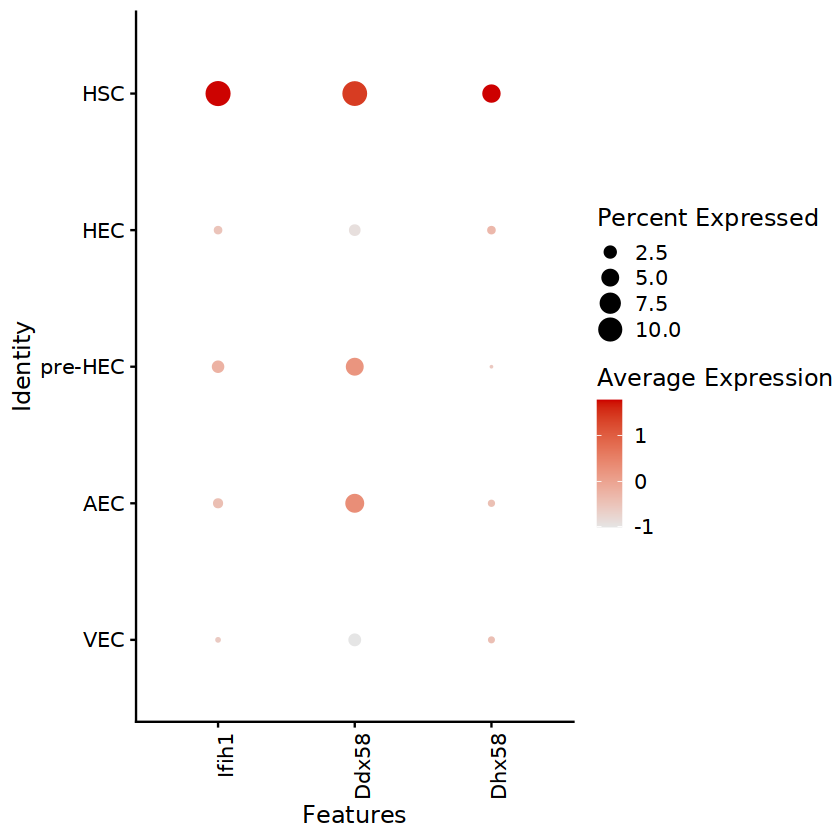

character(0)

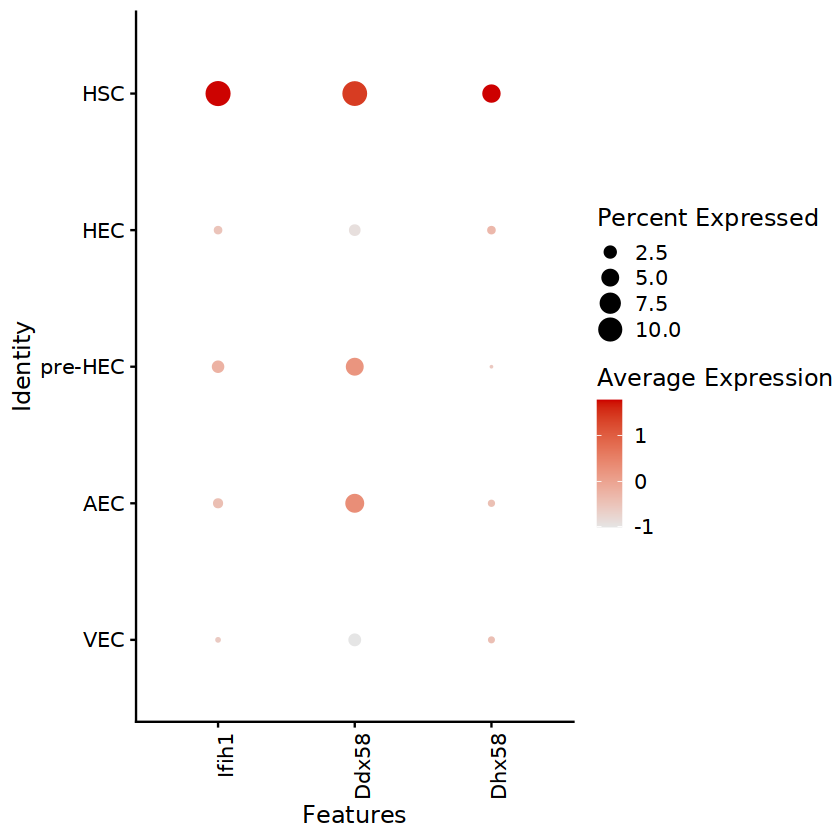

In [7]:
# RLRs signature MDA5, RIG-I, LGP2
rlrs <- c("Ifih1","Ddx58","Dhx58")
DotPlot(sample, features = rlrs, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

rlrs_up <- intersect(rlrs, rownames(hema_endo_fc_up))
DotPlot(sample, features = rlrs_up, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

rlrs_significant <- intersect(rlrs, rownames(hema_endo_marker_genes_significant))
rlrs_significant

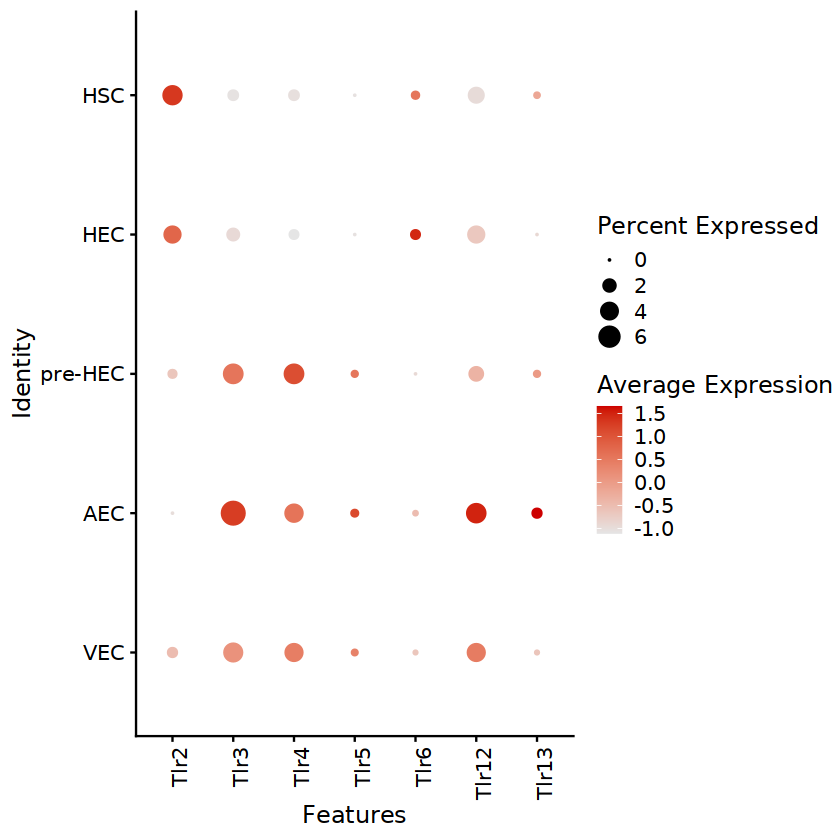

character(0)

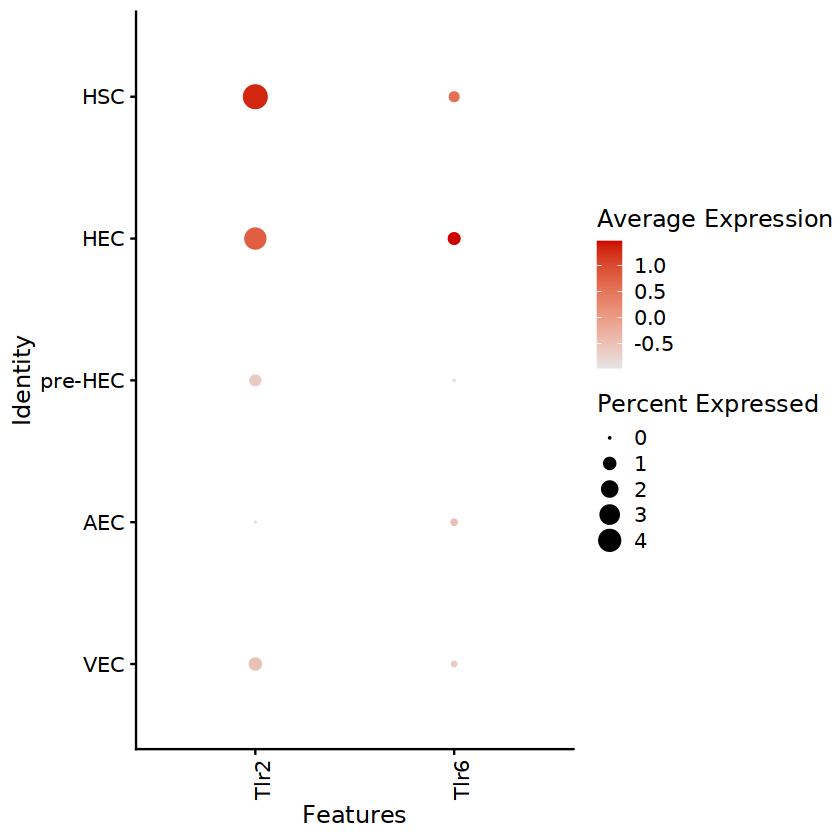

In [8]:
# TLRs signature
tlrs <- mixedsort(grep(rownames(sample), pattern = "^Tlr", value = T))
DotPlot(sample, features = tlrs, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

tlrs_up <- intersect(tlrs, rownames(hema_endo_fc_up))
DotPlot(sample, features = tlrs_up, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

tlrs_significant <- intersect(tlrs, rownames(hema_endo_marker_genes_significant))
tlrs_significant

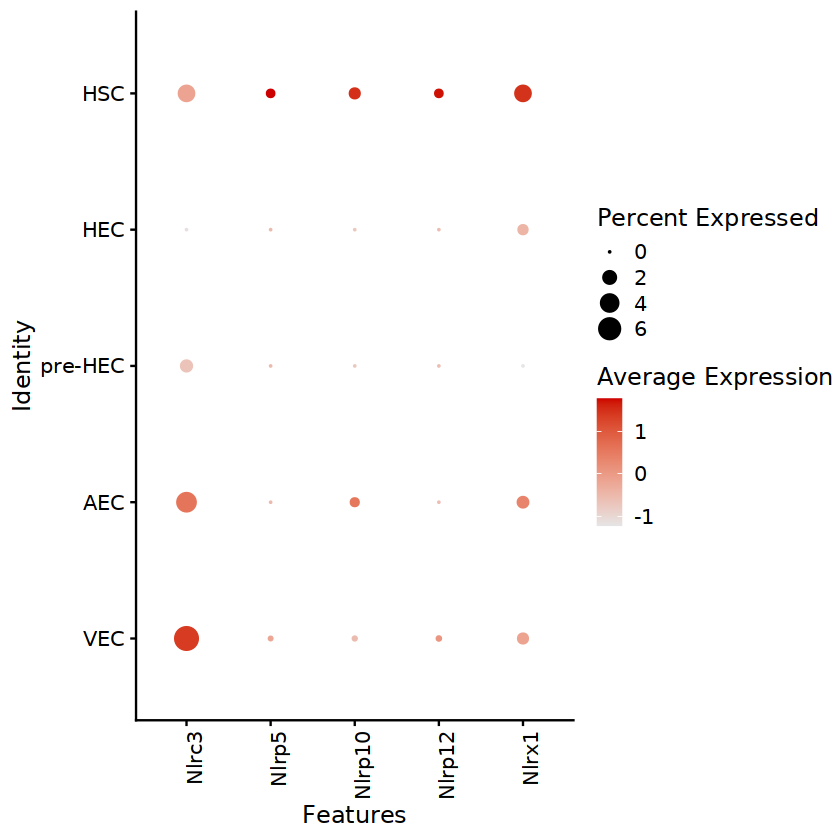

character(0)

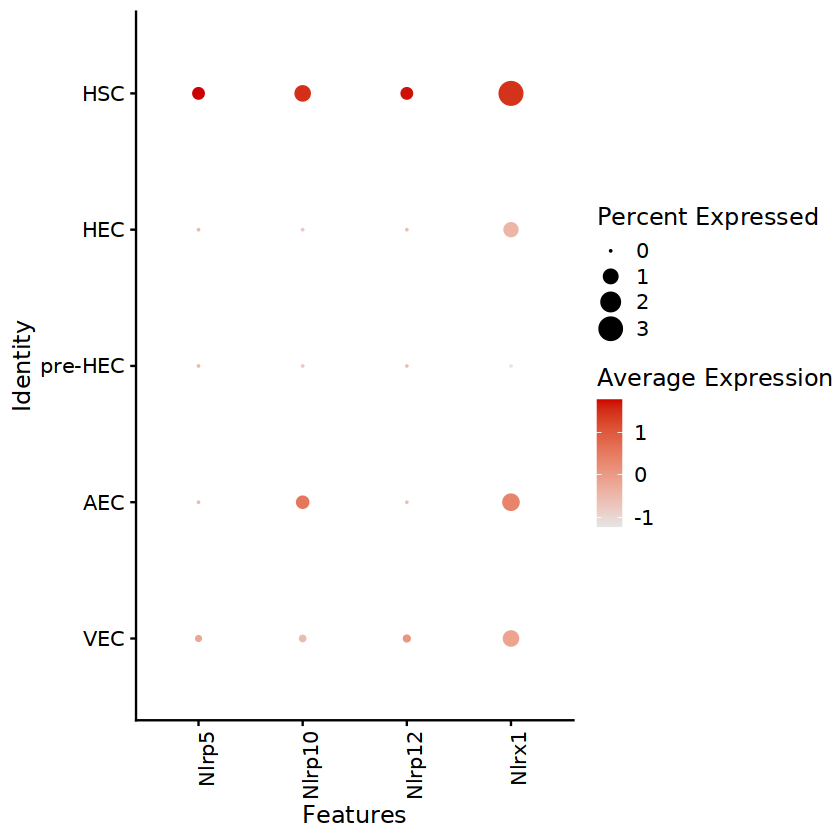

In [9]:
# NLRs signature
nlrs <- mixedsort(grep(rownames(sample), pattern = "^Nlr", value = T))
DotPlot(sample, features = nlrs, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

nlrs_up <- intersect(nlrs, rownames(hema_endo_fc_up))
DotPlot(sample, features = nlrs_up, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

nlrs_significant <- intersect(nlrs, rownames(hema_endo_marker_genes_significant))
nlrs_significant

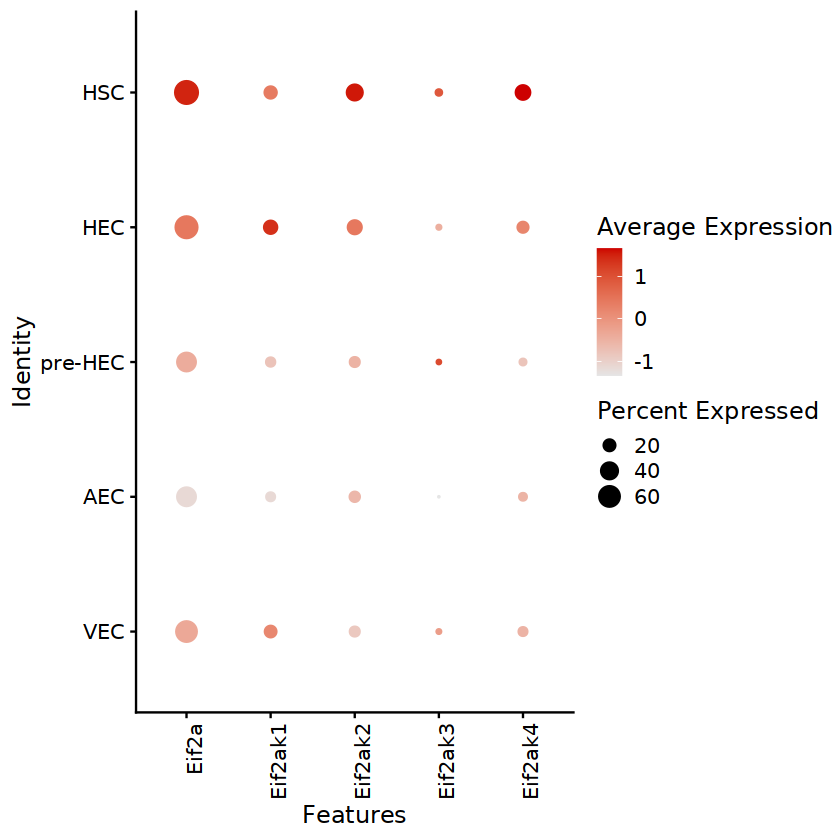

[1] "Eif2ak2"

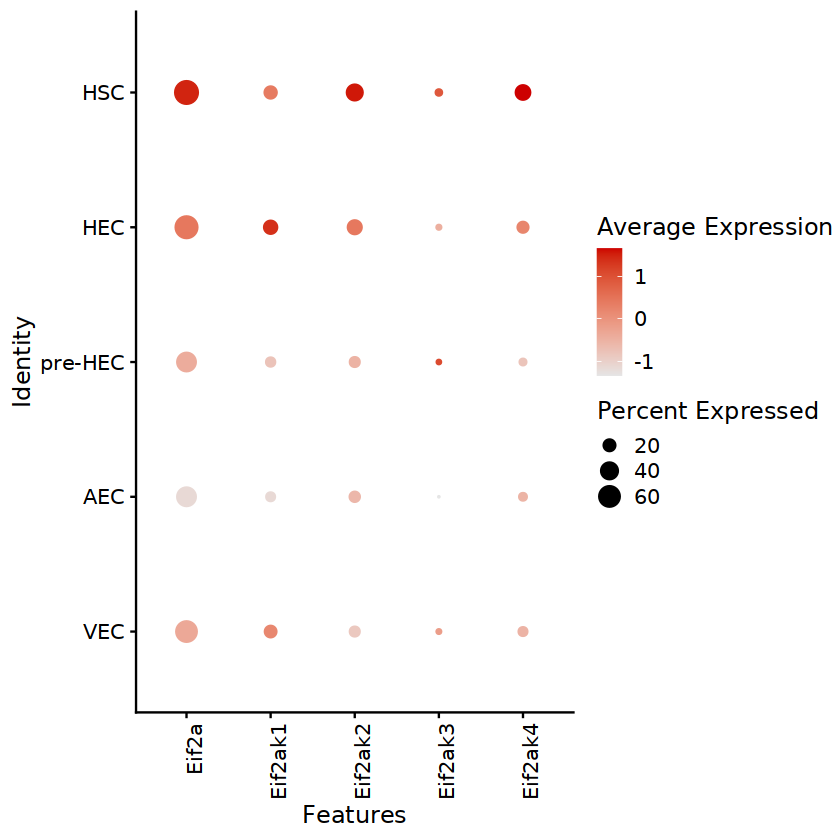

In [10]:
# PKRs signature
pkrs <- mixedsort(grep(rownames(sample), pattern = "^Eif2a", value = T))
DotPlot(sample, features = pkrs, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

pkrs_up <- intersect(pkrs, rownames(hema_endo_fc_up))
DotPlot(sample, features = pkrs_up, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

pkrs_significant <- intersect(pkrs, rownames(hema_endo_marker_genes_significant))
pkrs_significant

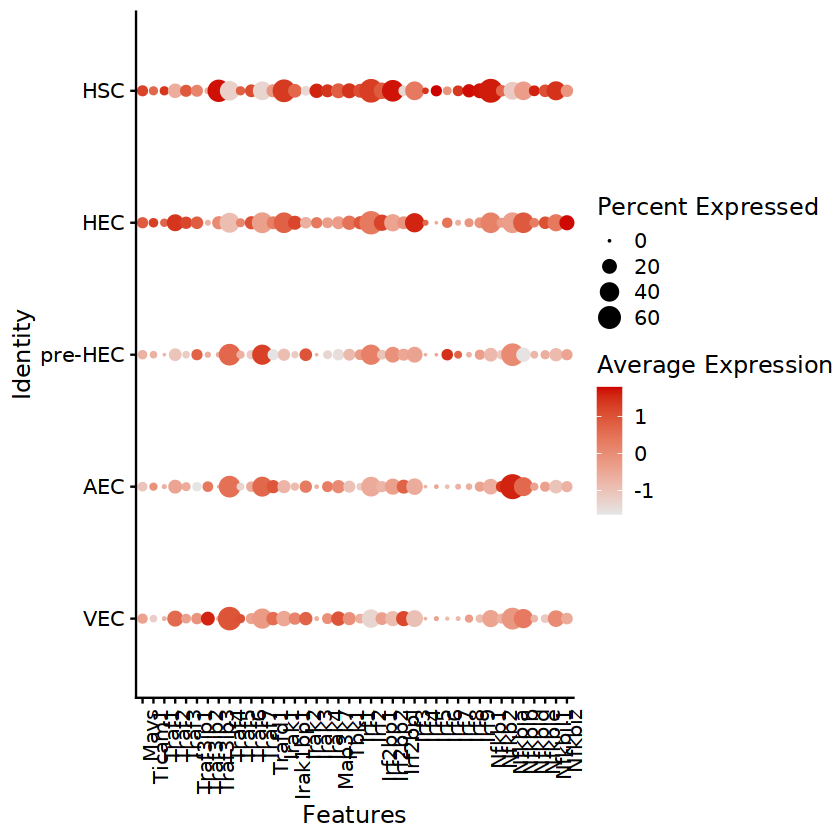

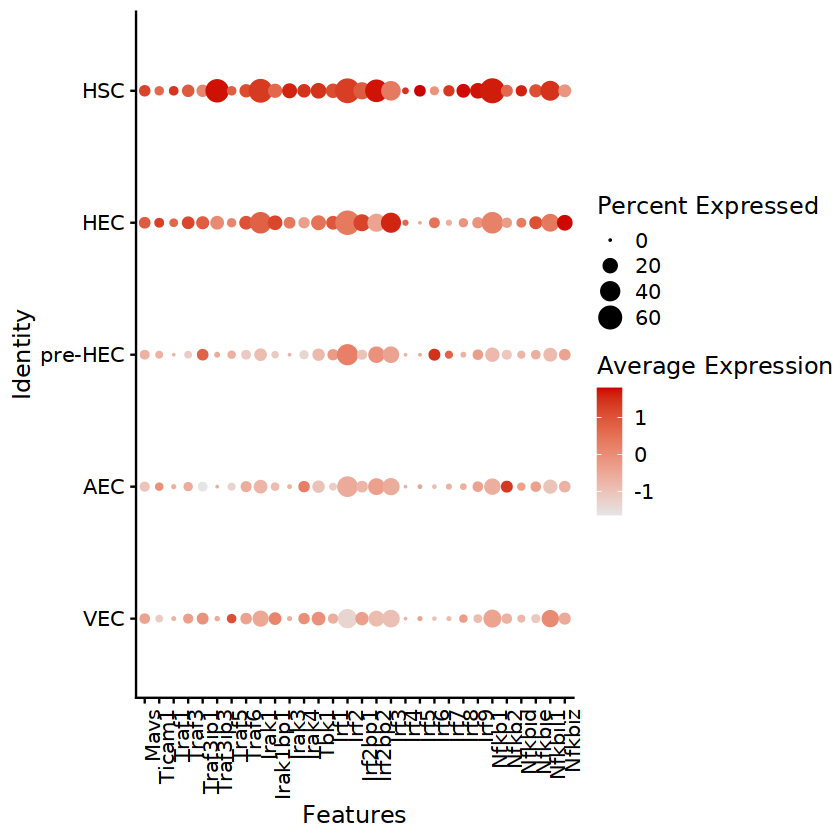

[1] "Traf3ip3" "Irak1"    "Irf2"     "Irf2bp2"  "Nfkb1"

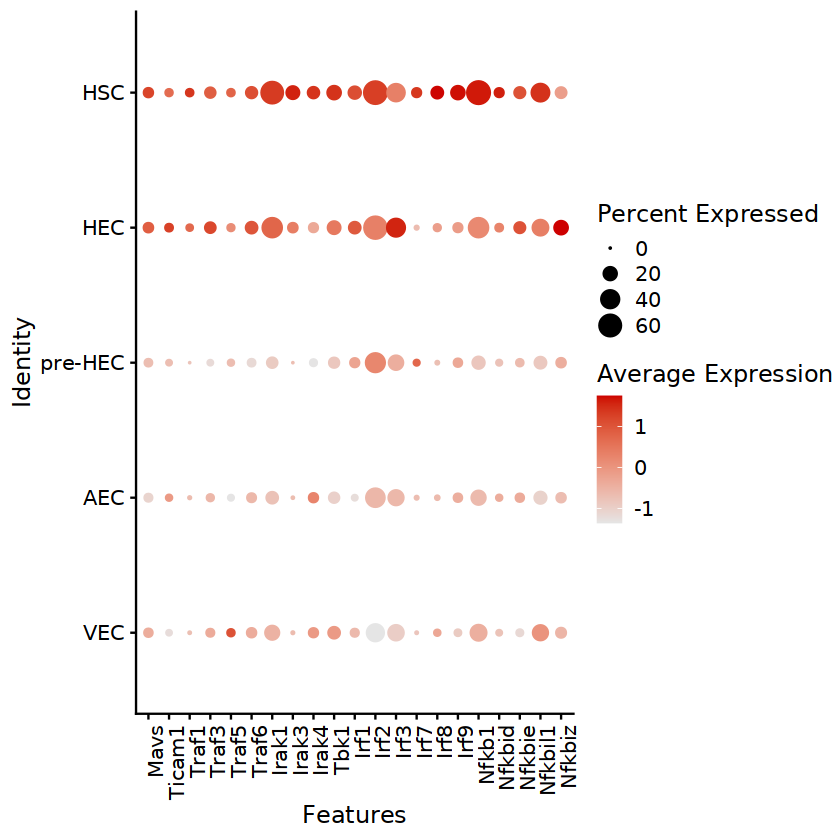

In [11]:
# intermediates signature
mavs <- c("Mavs")
trif <- "Ticam1"
trafs <- mixedsort(grep(rownames(sample), pattern = "^Traf", value = T))
iraks <- mixedsort(grep(rownames(sample), pattern = "^Irak", value = T))
tak1 <- "Map3k7"
tbk1 <- "Tbk1"
irfs <- mixedsort(grep(rownames(sample), pattern = "^Irf", value = T))
nfkbs <- mixedsort(grep(rownames(sample), pattern = "^Nfkb", value = T))
inters <- c(mavs, trif, trafs, iraks, tak1, tbk1, irfs, nfkbs)

DotPlot(sample, features = inters, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

inters_up <- intersect(inters, rownames(hema_endo_fc_up))
DotPlot(sample, features = inters_up, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

inters_up_selected <- setdiff(inters_up, c("TRAF1", "Traf3ip1", "Traf3ip3", "TRAFD1", "Irak1bp1", "Irf2bp1", "Irf2bp2", "Irf4", "Irf5", "Irf6","Nfkb2"))
DotPlot(sample, features = inters_up_selected, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

inters_significant <- intersect(inters, rownames(hema_endo_marker_genes_significant))
inters_significant

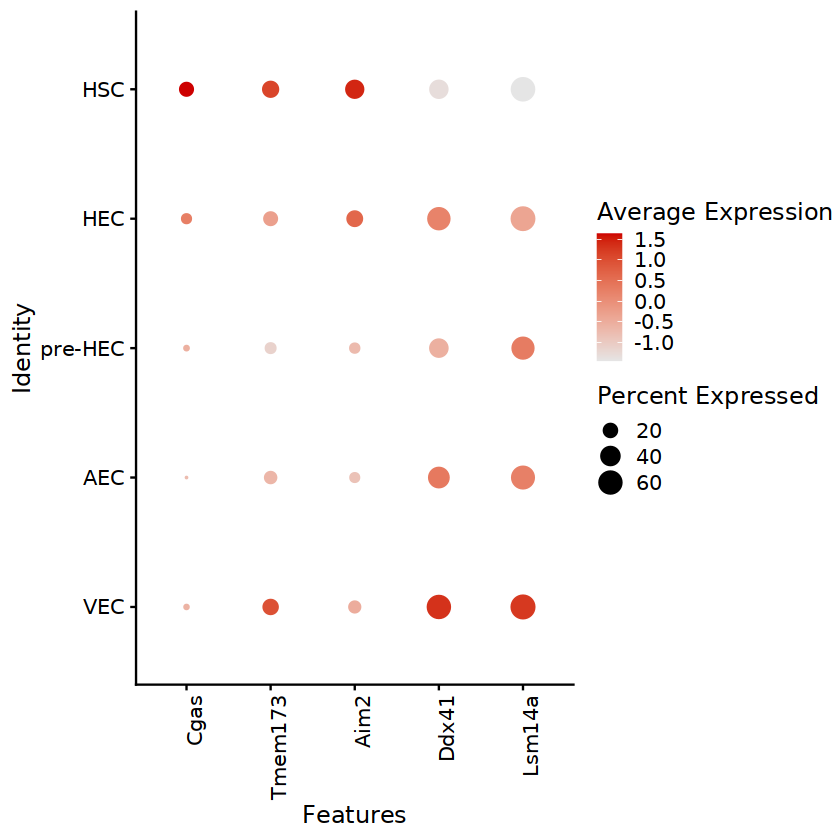

[1] "Aim2"

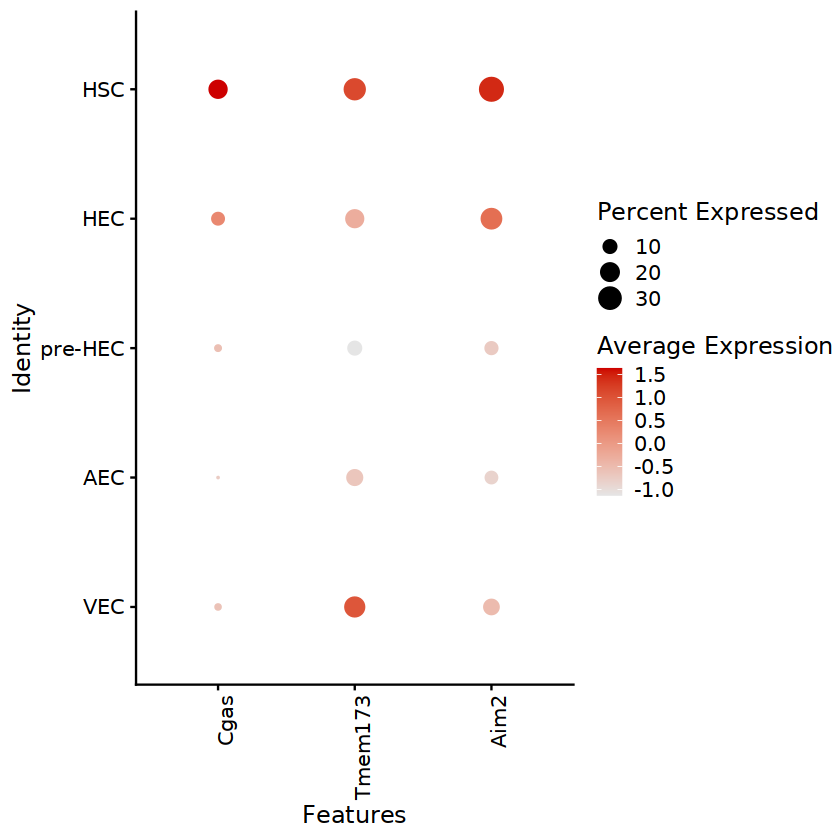

In [12]:
# DNA sensors
# dnas <- c("Cgas","Tmem173","Aim2","Ifi204","Ddx41","Lsm14a")
dnas <- c("Cgas","Tmem173","Aim2","Ddx41","Lsm14a")
DotPlot(sample, features = dnas, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

dnas_up <- intersect(dnas, rownames(hema_endo_fc_up))
DotPlot(sample, features = dnas_up, cols=c("grey90","red3"), scale.by = "size") + theme(axis.text.x=element_text(angle=90, hjust=1))

dnas_significant <- intersect(dnas, rownames(hema_endo_marker_genes_significant))
dnas_significant

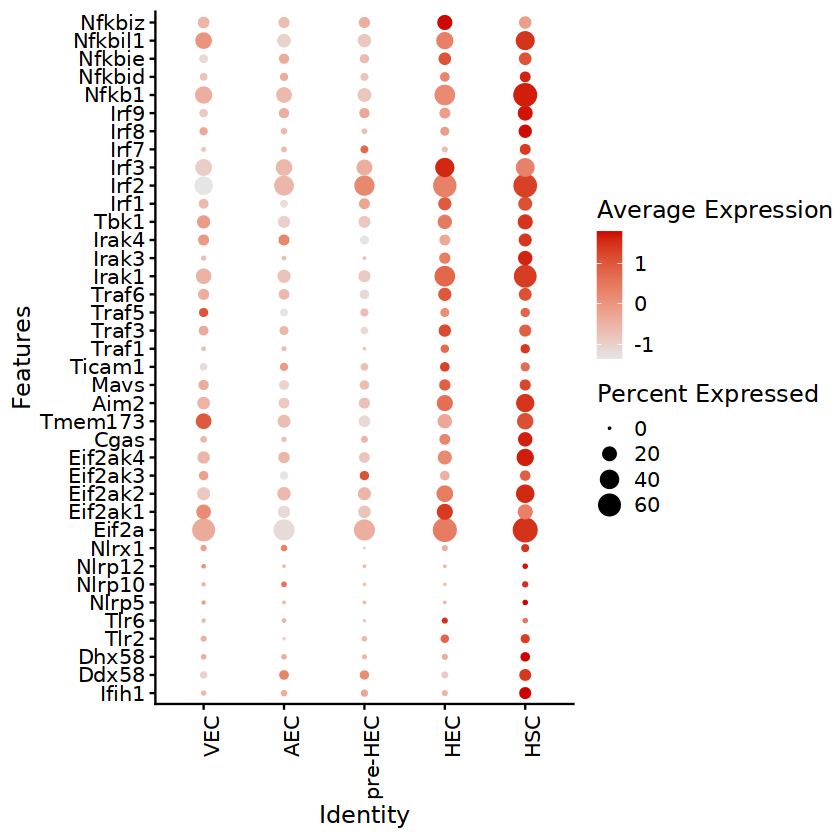

In [13]:
# TE sensor dotplot
te_sensors <- c(rlrs, tlrs, nlrs, pkrs, dnas, inters)
te_sensors_up <- c(rlrs_up, tlrs_up, nlrs_up, pkrs_up, dnas_up, inters_up_selected)
DotPlot(sample, features = te_sensors_up, cols=c("grey90","red3"), scale.by = "size") + coord_flip() + theme(axis.text.x=element_text(angle=90, hjust=1))

In [14]:
# average expression for all TE silencers
inflammatory_factors <- mixedsort(grep(rownames(sample), pattern = "^Ifn|^Ifi|^Il|^Tnf", value = T))
inflammatory_factors_up <- intersect(inflammatory_factors, rownames(hema_endo_fc_up))
te_sensors_all <- unique(c(te_sensors, inflammatory_factors))
te_sensors_all_exp <- AverageExpression(sample, assays = "SCT", group.by = "celltype", features = te_sensors_all)
te_sensors_all_exp <- as.data.frame(te_sensors_all_exp$SCT)
te_sensors_all_exp$Up <- "FALSE"
te_sensors_all_exp[c(te_sensors_up, inflammatory_factors_up), "Up"] <- "TRUE"
hema_count <- length(colnames(subset(sample, idents = c("HEC","HSC"))))
te_sensors_all_exp$Percentage <- as.numeric(rowSums(sample@assays$RNA@counts[te_sensors_all, colnames(subset(sample, idents = c("HEC","HSC")))] > 0) / hema_count)
# te_sensors_all_exp$Significant <- "FALSE"
# te_sensors_all_exp[unique(c(rlrs_significant, tlrs_significant, nlrs_significant, pkrs_significant, dnas_significant), "Significant"] <- "TRUE"
write.csv(te_sensors_all_exp, "meta/TE_sensors_all_average_expression_mouse.csv")

In [15]:
# plot the dotplot for TE sensors and downstream signals
p <- DotPlot(sample, features = rev(te_sensors_all), cols=c("grey90","red3"), scale.by = "size") + coord_flip() + theme(axis.text.x=element_text(angle=90, hjust=1))
png("figure/dotplot_TE_sensors_all_mouse.png", width = 500, height = 3500)
print(p)
dev.off()

png 
  2

In [16]:
# TE silencer heatmap
te_sensors_up_exp <- AverageExpression(sample, assays = "SCT", group.by = "celltype", features = te_sensors_up)
nrow(te_sensors_up_exp$SCT)
cc = colorRampPalette(rev(brewer.pal(n = 7, name = "PuOr")))
pheatmap(t(te_sensors_up_exp$SCT), cluster_rows = F, cluster_cols = F, scale = "column", color = cc(100), filename = "figure/TE_sensors_heatmap_mouse.pdf", width = 8, height = 2, border_color = "white")

[1] 38

In [17]:
# gene set enrichment analysis
m_df <- msigdbr(species = "Mus musculus")
m_t2g <- msigdbr(species = "Mus musculus", category = "H") %>% dplyr::select(gs_name, gene_symbol)
hema_endo_fc_ranked <- hema_endo_fc[order(hema_endo_fc$avg_log2FC, decreasing = T), ]
gene_list <- hema_endo_fc_ranked$avg_log2FC
names(gene_list) <- rownames(hema_endo_fc_ranked)
em <- GSEA(gene_list, TERM2GENE = m_t2g)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (15.7% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



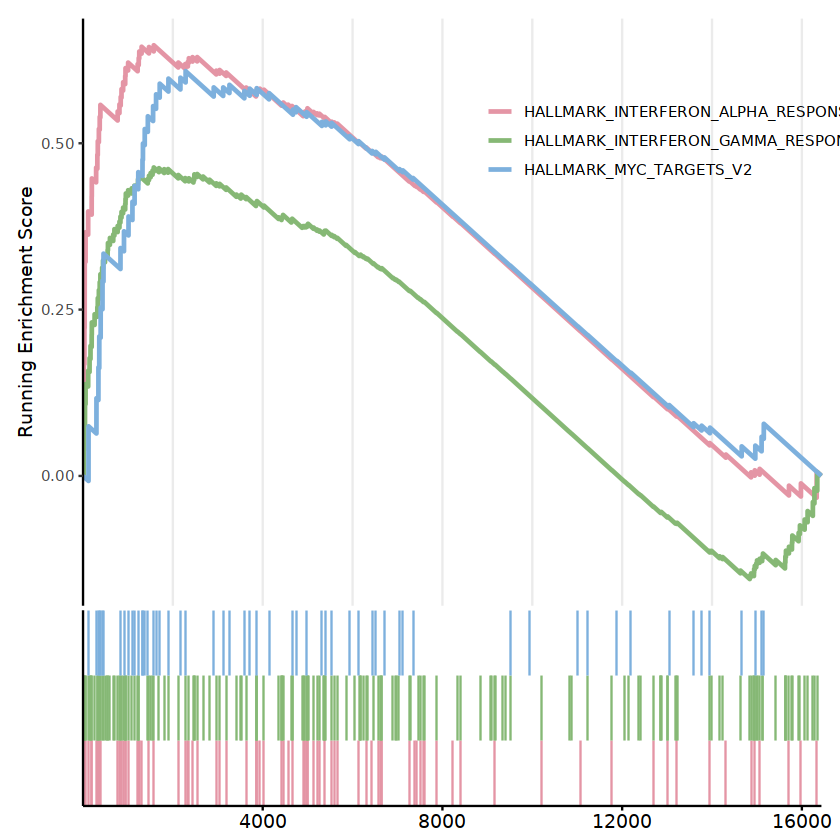

In [18]:
# plot gsea hallmark
gseaplot2(em, geneSetID = c("HALLMARK_INTERFERON_ALPHA_RESPONSE", "HALLMARK_INTERFERON_GAMMA_RESPONSE","HALLMARK_MYC_TARGETS_V2"), subplots = 1:2, color = c("#E495A5", "#86B875", "#7DB0DD"))
ggsave("figure/gsea_msigdb_hema_vs_endo_mouse.pdf", width = 5, height = 3)

In [19]:
# GO GSEA
ego <- gseGO(geneList     = gene_list,
              OrgDb        = org.Mm.eg.db,
              keyType      = "SYMBOL",
              ont          = "BP",
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = FALSE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (15.7% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


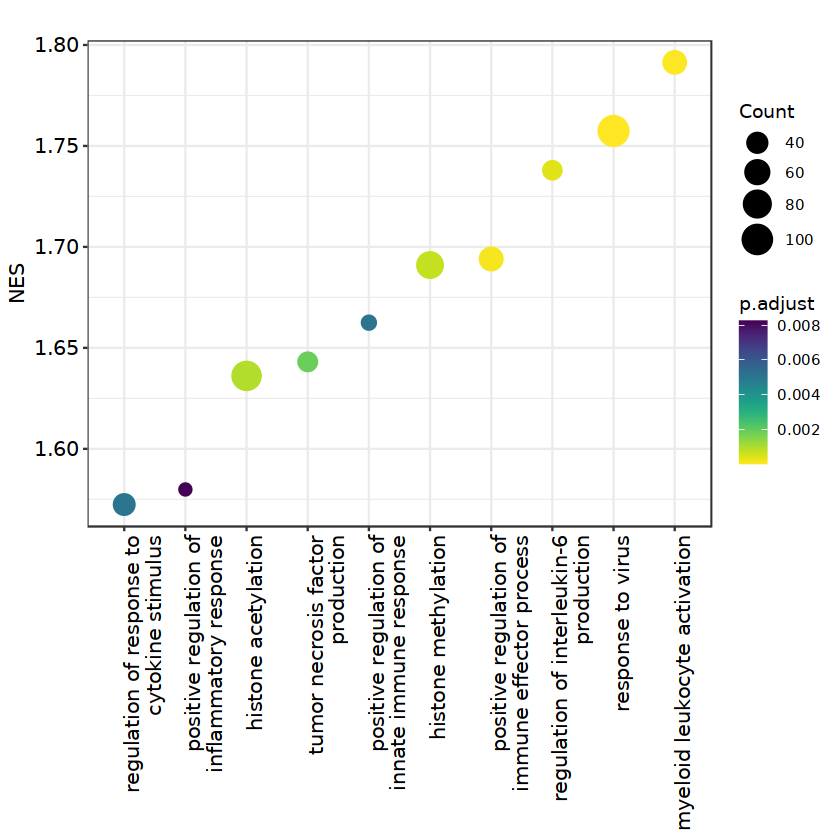

In [20]:
# plot 10 GO terms selected from top30
ego_pairwise <- pairwise_termsim(ego)

go_selected <- ego_pairwise@result[order(ego_pairwise@result$enrichmentScore, decreasing = T), "ID"][1:30]
go_selected <- c('myeloid leukocyte activation','positive regulation of immune effector process','histone acetylation','response to virus','tumor necrosis factor production','regulation of interleukin-6 production','positive regulation of innate immune response','histone methylation','positive regulation of inflammatory response','regulation of response to cytokine stimulus')

dotplot(ego_pairwise, showCategory = go_selected, x = "NES") + scale_color_viridis(option = "D", direction = -1) + coord_flip() + theme(axis.text.x=element_text(angle=90, hjust=1))
ggsave("figure/gsea_go_hema_vs_endo_mouse.pdf", width = 6, height = 4.5)

In [21]:
# save the functional enrichment results
write.csv(rbind(em@result[order(em@result$enrichmentScore, decreasing = T), ], ego@result[order(ego@result$enrichmentScore, decreasing = T), ]), "meta/functional_enrichment_hema_mouse.csv")

In [22]:
# score the TE related gene sets
te_silencers <- read.csv("meta/TE_silencers_all_average_expression_mouse.csv", row.names = 1)
te_silencers <- rownames(subset(te_silencers, Down == TRUE))

te_module_mm10 <- read.csv("meta/te_module_mm10.csv", row.names = 1)
te_mme5_good <- rownames(subset(te_module_mm10, kME >= 0.3))

te_immune <- unlist(strsplit(ego_pairwise@result[ego_pairwise@result$Description == 'positive regulation of immune effector process', "core_enrichment"], split = "/", fixed = T))

te_sensors_list <- list(TE_Silencers = te_silencers, TEs_MME5 = te_mme5_good, TE_Sensors = te_sensors_up, TE_Inflammatory = inflammatory_factors_up, TE_Immune = te_immune, TE_Sensors_Immune = unique(c(te_sensors_up, inflammatory_factors_up, te_immune)))

sample_score <- sample
sample_score <- AddModuleScore(sample_score, features = te_sensors_list, assay = "SCT")
colnames(sample_score@meta.data)[13:18] <- names(te_sensors_list)

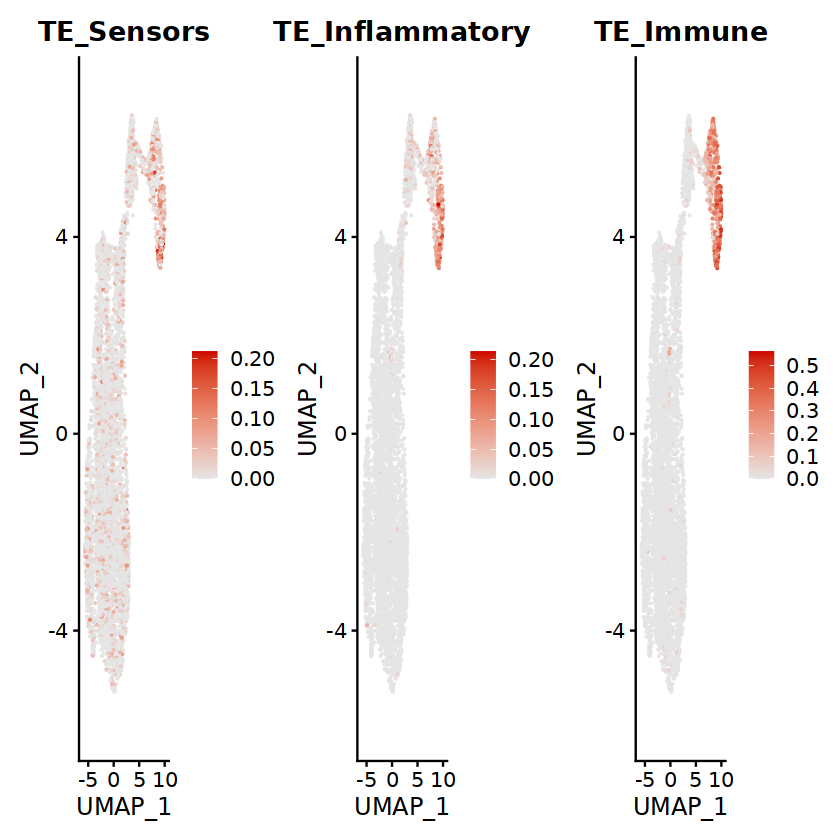

In [23]:
# plot TE sensing and immune response featureplot
FeaturePlot(sample_score, features=c("TE_Sensors","TE_Inflammatory","TE_Immune"), cols=c("grey90","red3"), pt.size = 0.1, reduction="umap", min.cutoff = 0, ncol = 3)
ggsave("figure/featureplot_TE_sensor_signaling_mouse.pdf", width = 9, height = 3)

In [24]:
# normalization scores from 0 to 1
sample_score$TE_Silencers_01 <- (sample_score$TE_Silencers - min(sample_score$TE_Silencers)) / (max(sample_score$TE_Silencers) - min(sample_score$TE_Silencers))
sample_score$TEs_MME5_01 <- (sample_score$TEs_MME5 - min(sample_score$TEs_MME5)) / (max(sample_score$TEs_MME5) - min(sample_score$TEs_MME5))
sample_score$TE_Sensors_Immune_01 <- (sample_score$TE_Sensors_Immune - min(sample_score$TE_Sensors_Immune)) / (max(sample_score$TE_Sensors_Immune) - min(sample_score$TE_Sensors_Immune))
#sample_score$TE_Inflammatory_01 <- (sample_score$TE_Inflammatory - min(sample_score$TE_Inflammatory)) / (max(sample_score$TE_Inflammatory) - min(sample_score$TE_Inflammatory))
#sample_score$TE_Immune_01 <- (sample_score$TE_Immune - min(sample_score$TE_Immune)) / (max(sample_score$TE_Immune) - min(sample_score$TE_Immune))
#TE_trend_all <- data.frame(score = c(sample_score$TE_Silencers_01, sample_score$TEs_HME5_01, sample_score$TE_Sensors_01, sample_score$TE_Inflammatory_01, sample_score$TE_Immune_01), celltype = rep(sample_score$celltype, 5), score_type = rep(c("TE_Silencers", "TEs_HME5", "TE_Sensors", "TE_Inflammatory", "TE_Immune"), each = nrow(sample_score@meta.data)))
TE_trend_all <- data.frame(score = c(sample_score$TE_Silencers_01, sample_score$TEs_MME5_01, sample_score$TE_Sensors_Immune_01), celltype = rep(sample_score$celltype, 3), score_type = rep(c("TE_Silencers", "TEs_MME5", "TE_Sensors_Immune"), each = nrow(sample_score@meta.data)))

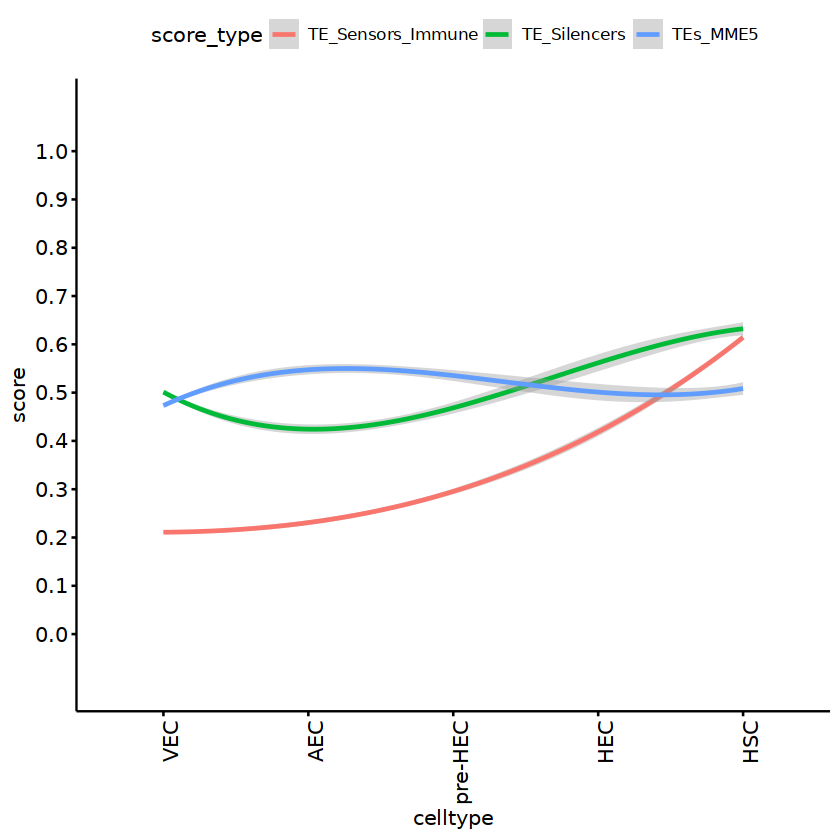

In [25]:
# plot the average expression trend
ggviolin(TE_trend_all, x = "celltype", y = "score", color = "white") + geom_smooth(method = lm, formula = y ~ splines::bs(x, 3), se = TRUE, level = 0.95, aes(color = score_type, group = score_type)) + theme(axis.text.x=element_text(angle=90, hjust=1)) + scale_y_continuous(breaks = seq(0, 1, by = 0.1))
ggsave("figure/TE_trend_all_mouse.pdf", width = 5, height = 5)

In [26]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /root/miniconda3/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] gtools_3.9.4          ggVolcano_0.0.2       lubridate_1.9.2      
 [4] forcats_1.0.0         stringr_1.5.0         purrr_1.0.1          
 [7] readr_2.1.4           tidyr_1.3.0           tibble_3.2.0         
[10] tidyverse_2.0.0       pheatmap_1.0.12       reshape2_1.4.4       
[13] ggrepel_0.9.3         RColorBrewer_1.1-3    viridis_0.6.2        
[16] viridisLite_0.4.1     Hmisc_5.0-1          